In [14]:
import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Create a graph with some nodes

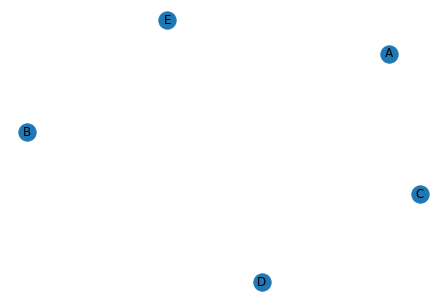

In [15]:
G = nx.Graph()  # For some of the examples here, change Graph to Digraph

G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')


nx.draw(G, with_labels=True)



### Add edges to the graph

In [3]:
G.add_edge('A', 'C')
G.add_edge('A', 'B')
G.add_edge('D', 'C')
G.add_edge('C', 'A')

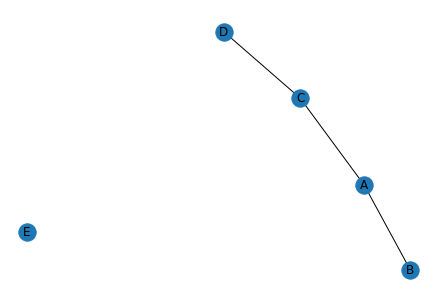

In [4]:
nx.draw(G, with_labels=True)



In [5]:
G.nodes

NodeView(('A', 'B', 'C', 'D', 'E'))

In [6]:
for x in G.edges:
    print(x[0])

A
A
C


### Get the adjacency matrix

In [8]:
oneStep=nx.to_numpy_matrix(G)
print(oneStep)

[[0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [9]:
# two step只要把这个矩阵再乘一次自己就得到2步内可到达的点

In [10]:
oneStep.sum(axis=1) #.sum(axis=0) either instead or in addition

matrix([[2.],
        [1.],
        [2.],
        [1.],
        [0.]])

### Get the two-step matrix

In [11]:
twoStep=np.dot(oneStep,oneStep)

In [12]:
print(twoStep)

[[2. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0.]
 [0. 1. 2. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]


### Manually construct a cycle using loops

In [18]:
G2 = nx.Graph()
N=10
for i in range(N):
    G2.add_node(i)
    if i>0:
        G2.add_edge(i,i-1)
G2.add_edge(0,N-1)


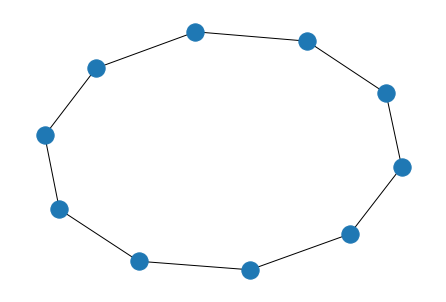

In [19]:
nx.draw(G2)

### Digraph example

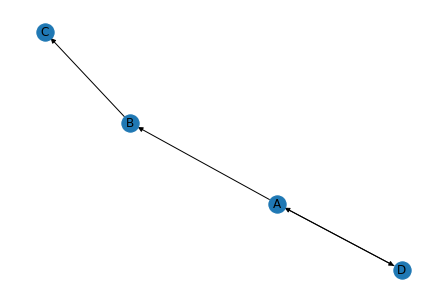

In [20]:
G = nx.DiGraph()

G.add_nodes_from(['A', 'B', 'C','D'])
G.add_edges_from([('A', 'B'), ('A', 'D'), ('B', 'C'),('D','A')])


nx.draw(G, with_labels=True)

# what will be the outcome of one step? two step?

### Weighted graph

In [10]:
G=nx.Graph()
num_nodes=10
G.add_nodes_from(range(num_nodes))
from_list=list(range(num_nodes))
to_list=list(range(num_nodes))
to_list.append(to_list.pop(0))
weights=[1]*9
weights.append(4)

In [11]:
print(to_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 0]


In [12]:
import copy

edges=zip(from_list,to_list,weights) #zip makes a list of tuple from lists

# I'm not sure why list breaks up the zip...
zipcopy=copy.deepcopy(edges)
print(list(zipcopy))

print(list(zipcopy))



[(0, 1, 1), (1, 2, 1), (2, 3, 1), (3, 4, 1), (4, 5, 1), (5, 6, 1), (6, 7, 1), (7, 8, 1), (8, 9, 1), (9, 0, 4)]
[]


In [13]:
G.add_weighted_edges_from(edges)
G.edges()


EdgeView([(0, 1), (0, 9), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

### Layouts etc.
https://networkx.github.io/documentation/stable/reference/drawing.html

{(0, 1): Text(-0.13809633009075933, 0.0760028361642258, '1'),
 (0, 9): Text(-0.5366254636608883, 0.372126168145113, '4'),
 (1, 2): Text(0.3846293548563206, -0.30615306968642825, '1'),
 (2, 3): Text(0.6337994065338652, -0.7598238163278161, '1'),
 (3, 4): Text(0.44332391553677186, -0.9626406629912836, '1'),
 (4, 5): Text(0.13590762207375673, -0.6555012635816435, '1'),
 (5, 6): Text(0.05471627492703278, -0.036072668466198915, '1'),
 (6, 7): Text(-0.02665568585314604, 0.5958950518739885, '1'),
 (7, 8): Text(-0.3460440816592369, 0.9327402329987984, '1'),
 (8, 9): Text(-0.6049550126637164, 0.743427191871246, '1')}

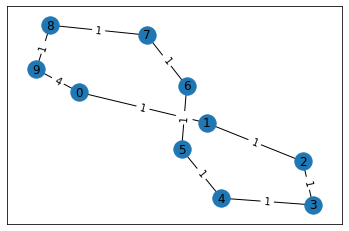

In [29]:
pos=nx.spring_layout(G) 
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
#plt.show()

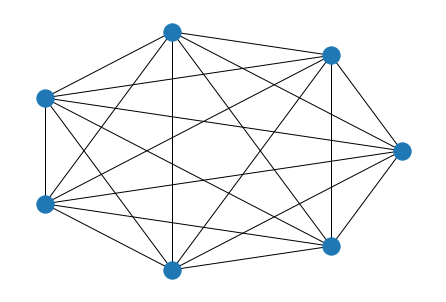

In [30]:
G2 = nx.complete_graph(7)

#plt.figure() #for creating new figures
nx.draw_circular(G2)